In [1]:
#필요한 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#소수점 둘째자리 까지만 표시
pd.options.display.float_format = '{:.2f}'.format

In [139]:
#데이터 로드
train = pd.read_csv('C:/myPyCode/data/train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C


In [140]:
#데이터 확인중
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [9]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.00,0,0,370376,7.75,NaN,Q


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [71]:
train.info()
# Name, Sex, Ticket, Cabin, Embarked : object 확인
# Age, Cabin, Embarked : 다량의 Nan 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


In [141]:
# 종속변수를 Survived로 결정
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [142]:
# 독립변수는 Pclass, SibSp, Parch, Ticket, Fare, Cabin, Embarked로 결정
train.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male 22.00      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.00      1   
2                               Heikkinen, Miss. Laina  female 26.00      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female 35.00      1   
4                             Allen, Mr. William Henry    male 35.00      0   
..                                   

In [143]:
# 범주형 변수
train.describe(include ='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [144]:
# 서로간의 상관관계 분석

# 0.2 이하 : 상관관계가 거의 없음
# 0.2 ~ 0.4 : 낮은 상관관계
# 0.4 ~ 0.6 : 중간 상관관계
# 0.6 ~ 0.8 : 높은 상관관계
# 0.8 이상 : 매우 높은 상관관계

train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.01,-0.04,0.04,-0.06,-0.00,0.01
Survived,-0.01,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.04,-0.34,1.00,-0.37,0.08,0.02,-0.55
Age,0.04,-0.08,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.06,-0.04,0.08,-0.31,1.00,0.41,0.16
Parch,-0.00,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.01,0.26,-0.55,0.10,0.16,0.22,1.00


<AxesSubplot:>

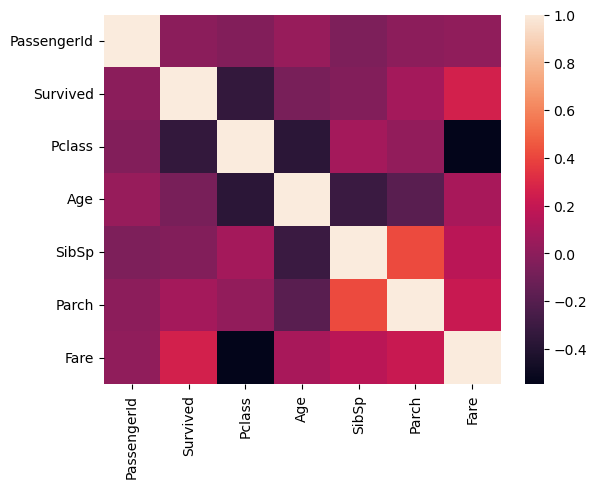

In [36]:
#상관관계 시각화
sns.heatmap(train.corr())

<AxesSubplot:>

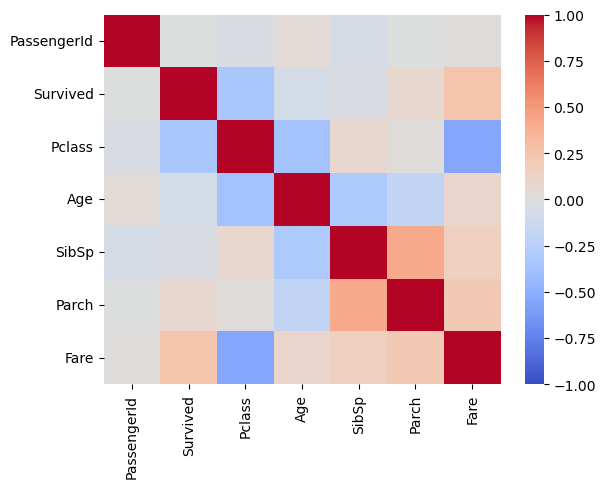

In [37]:
# 최댓값과 최소값을 1~-1로 설정, 색상 변경
sns.heatmap(train.corr(), cmap='coolwarm', vmin = -1, vmax = 1)

<AxesSubplot:>

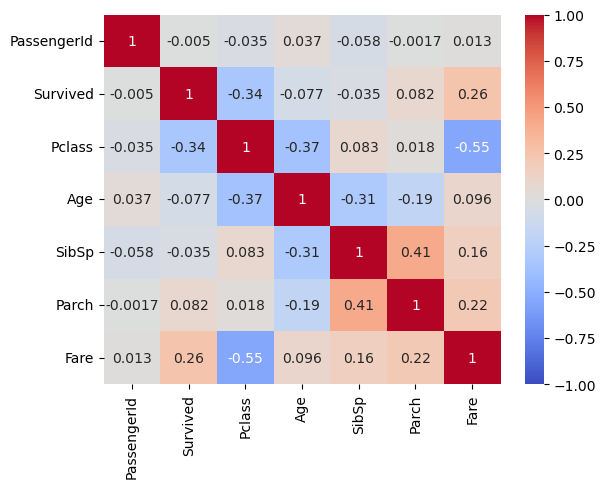

In [38]:
# 시각화에 수치도 표시
sns.heatmap(train.corr(), cmap = 'coolwarm', vmin = -1, vmax = 1, annot = True)

In [145]:
#PassengerId만 인덱스로 만들어버림 (화면에선 사라짐)
train.set_index('PassengerId', inplace = True)

<AxesSubplot:>

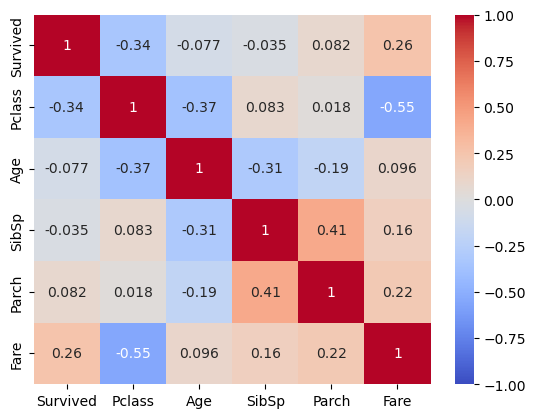

In [43]:
# 시각화
sns.heatmap(train.corr(), cmap = 'coolwarm', vmin = -1, vmax = 1, annot = True)

In [44]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [146]:
# 데이터 전처리
# 결측치 수 확인
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<AxesSubplot:>

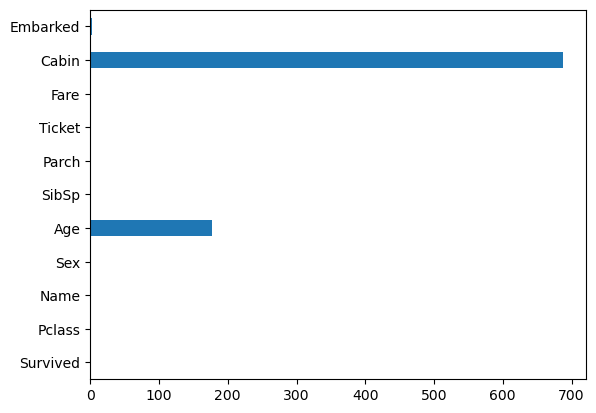

In [147]:
train.isnull().sum().plot(kind='barh')

In [148]:
# 결측치의 비율 확인
train.isnull().sum() / len(train)

Survived   0.00
Pclass     0.00
Name       0.00
Sex        0.00
Age        0.20
SibSp      0.00
Parch      0.00
Ticket     0.00
Fare       0.00
Cabin      0.77
Embarked   0.00
dtype: float64

<AxesSubplot:>

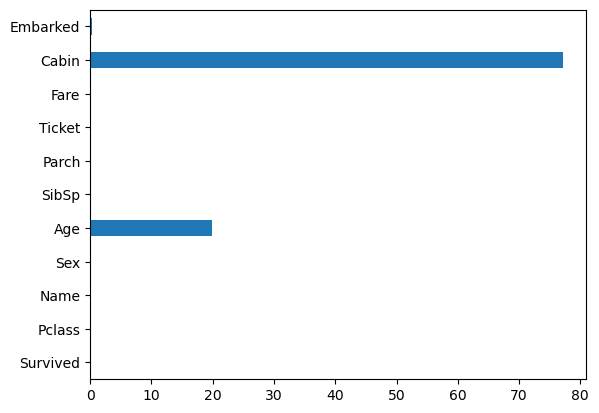

In [149]:
# 비율에 100을 곱함 + 시각화
c = train.isnull().sum() / len(train) *100
c.plot(kind='barh')


In [150]:
# Embarked의 value들 확인
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [151]:
# 각 value들의 갯수 확인
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:>

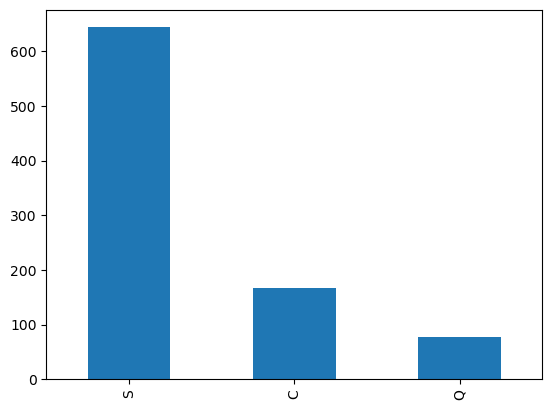

In [152]:
# 시각화
train.Embarked.value_counts().plot(kind='bar')

In [153]:
# nan 채우기
train.Embarked = train.Embarked.fillna('S')
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [154]:
# 알파벳 대문자로 시작하는 것만 남길 예정
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [73]:
# 승객들의 이름.
train.Name

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [156]:
# cabin 컬럼의 drop
train.drop('Cabin', axis = 1, inplace = True)

<AxesSubplot:>

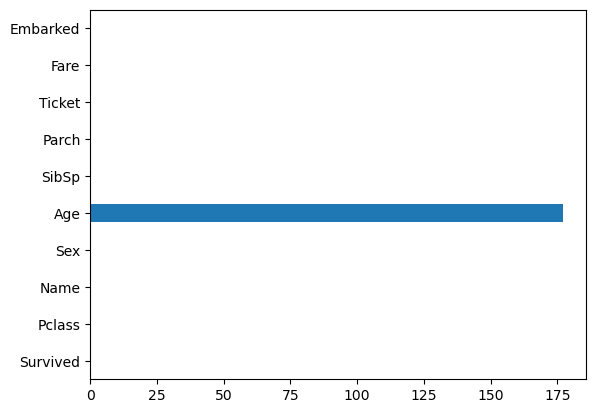

In [157]:
# 결측치를 없앤것 시각화
train.isnull().sum().plot(kind='barh')

<AxesSubplot:ylabel='Frequency'>

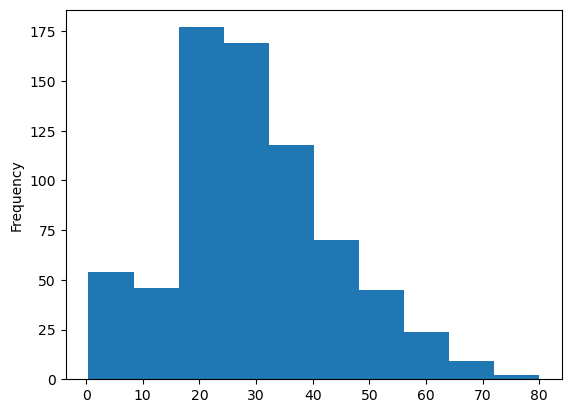

In [158]:
#Age 결측치 처리
train.Age.plot(kind='hist')

In [77]:
# 나이의 전체 평균
train.Age.mean()

29.69911764705882

In [86]:
# 이름은 survived와 관련이 없을 것이므로 drop진행


In [87]:
# 행조건, 열조건 (인덱스)
train.loc[train.Age.isnull(),'Age']

PassengerId
6     NaN
18    NaN
20    NaN
27    NaN
29    NaN
       ..
860   NaN
864   NaN
869   NaN
879   NaN
889   NaN
Name: Age, Length: 177, dtype: float64

In [93]:
train.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

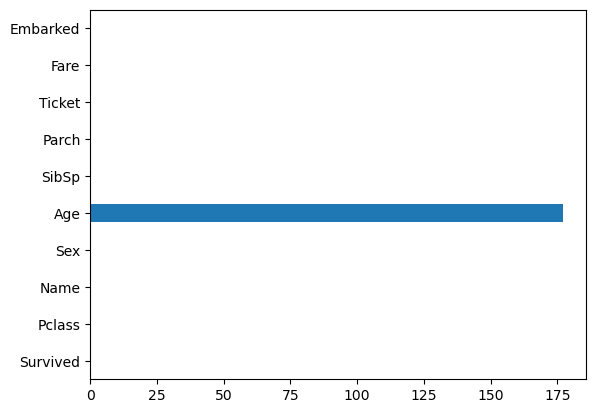

In [159]:
# 전처리 확인
train.isnull().sum().plot(kind='barh')
plt.show()

In [160]:
#age nan 강제처리 >> 0으로
train.Age = train.Age.fillna(0)
train.Age
train.Age.value_counts()

0.00     177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 89, dtype: int64

<AxesSubplot:>

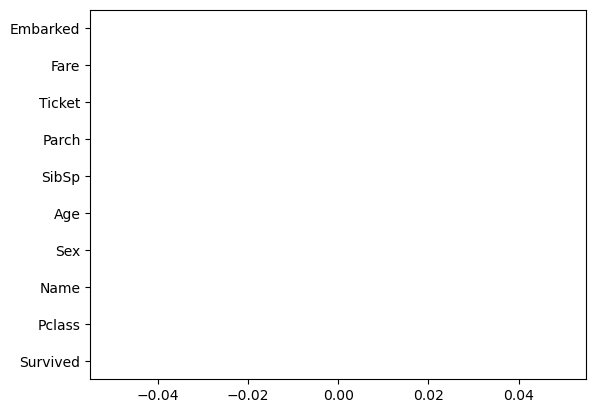

In [162]:
# 남는 결측치 다 없앴는지 확인
train.isnull().sum().plot(kind='barh')

In [163]:
# 또 없애야 할 것이 남았는지 확인
train.columns # Name 드랍, Ticket 드랍

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [165]:
# 위의 3개 드랍 실시
train.drop(['Ticket','Name'], axis = 1, inplace=True)

In [166]:
#object 남았는지 확인
train.info() # sex, embarked 더미데이터

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [167]:
# age 분포 한번 확인
train.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,  0.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [169]:
# 더미데이터 진행
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)

In [171]:
# object 없어졌는지 최종확인
train.info() # good

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.3 KB


In [172]:
# 훈련셋, 시험셋 시작
# 사이킷런 모델_셀렉션 임포트

from sklearn.model_selection import train_test_split

X = train.drop('Survived', axis = 1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [175]:
# 모델링

#로지스틱 회귀문제도 사이킷런 선형 모델 임포트
from sklearn.linear_model import LogisticRegression

In [177]:
# 분류 문제 학습
model = LogisticRegression()

model.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [179]:
# 이 모델로 시험셋 예측

pred = model.predict(X_test)
pred # 완료

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1], dtype=int64)

In [181]:
# proba로 각 클래스의 예측확률 계산 (0~1사이)
pred_proba = model.predict_proba(X_test)
pred_proba

array([[0.11560003, 0.88439997],
       [0.87974487, 0.12025513],
       [0.20027956, 0.79972044],
       [0.25494117, 0.74505883],
       [0.14993118, 0.85006882],
       [0.90707709, 0.09292291],
       [0.77096776, 0.22903224],
       [0.12316231, 0.87683769],
       [0.56109064, 0.43890936],
       [0.30912979, 0.69087021],
       [0.91160198, 0.08839802],
       [0.45103219, 0.54896781],
       [0.63829047, 0.36170953],
       [0.71571496, 0.28428504],
       [0.25500713, 0.74499287],
       [0.5581267 , 0.4418733 ],
       [0.93904871, 0.06095129],
       [0.9300271 , 0.0699729 ],
       [0.92304253, 0.07695747],
       [0.26021541, 0.73978459],
       [0.91904653, 0.08095347],
       [0.91706169, 0.08293831],
       [0.06923682, 0.93076318],
       [0.75330085, 0.24669915],
       [0.4259438 , 0.5740562 ],
       [0.91373636, 0.08626364],
       [0.07727994, 0.92272006],
       [0.26048474, 0.73951526],
       [0.78289472, 0.21710528],
       [0.07554961, 0.92445039],
       [0.

In [182]:
# 모델 평가
# 사이킷런 metrics 에서 accuracy_score 임포트

from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred) # 78점

0.7877094972067039

In [183]:
# 위에서 만든 모델의 기울기들을 표현
# y = ax+b
model.coef_

array([[-1.06213802e+00, -1.37335019e-02, -2.74836937e-01,
         9.95723411e-02,  8.96074806e-04, -2.54356233e+00,
         3.05697990e-01, -2.12969802e-01]])

In [186]:
# 모델의 절편
model.intercept_

array([3.9458546])

In [187]:
# 모델 차원
model.coef_.shape

(1, 8)

In [188]:
# 차원축소
model.coef_[0].shape

(8,)

In [198]:
#모델의 인덱스별로 기울기 매개변수 계산

model_graph = pd.Series(model.coef_[0], index = X.columns)
model_graph

Pclass       -1.06
Age          -0.01
SibSp        -0.27
Parch         0.10
Fare          0.00
Sex_male     -2.54
Embarked_Q    0.31
Embarked_S   -0.21
dtype: float64